In [3]:
# Dependencies
import pandas as pd
import json
import csv
import matplotlib.pyplot as plt
import numpy as np

In [4]:
file_name = "SPreworked.csv"
master_df = pd.read_csv(file_name)
master_df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Change,Month,Day,Year
0,0,12/29/2017,2689.149902,2692.120117,2673.610107,2673.610107,2673.610107,2443490000,-0.005779,December,Friday,2017
1,1,12/28/2017,2686.100098,2687.659912,2682.689941,2687.540039,2687.540039,2153330000,0.000536,December,Thursday,2017
2,2,12/27/2017,2682.100098,2685.639893,2678.909912,2682.620117,2682.620117,2202080000,0.000194,December,Wednesday,2017
3,3,12/26/2017,2679.090088,2682.739990,2677.959961,2680.500000,2680.500000,1968780000,0.000526,December,Tuesday,2017
4,4,12/22/2017,2684.219971,2685.350098,2678.129883,2683.340088,2683.340088,2399830000,-0.000328,December,Friday,2017


In [5]:
day_to_num = []
month_to_num = []

x = 0

while x < len(master_df["Day"]):
    
    if master_df["Day"][x] == "Monday":
        day_to_num.append(1)
    elif master_df["Day"][x] == "Tuesday":
        day_to_num.append(2)
    elif master_df["Day"][x] == "Wednesday":
        day_to_num.append(3)
    elif master_df["Day"][x] == "Thursday":
        day_to_num.append(4)
    else:
        day_to_num.append(5)
        
    x += 1

z = 0

while z < len(master_df["Month"]):
    
    if master_df["Month"][z] == "January":
        month_to_num.append(1)
    elif master_df["Month"][z] == "February":
        month_to_num.append(2)
    elif master_df["Month"][z] == "March":
        month_to_num.append(3)
    elif master_df["Month"][z] == "April":
        month_to_num.append(4)
    elif master_df["Month"][z] == "May":
        month_to_num.append(5)
    elif master_df["Month"][z] == "June":
        month_to_num.append(6)
    elif master_df["Month"][z] == "July":
        month_to_num.append(7)
    elif master_df["Month"][z] == "August":
        month_to_num.append(8)
    elif master_df["Month"][z] == "September":
        month_to_num.append(9)
    elif master_df["Month"][z] == "October":
        month_to_num.append(10)
    elif master_df["Month"][z] == "November":
        month_to_num.append(11)
    else:
        month_to_num.append(12)
        
    z += 1

master_df["Date to Num"] = day_to_num
master_df["Month to Num"] = month_to_num
master_df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Change,Month,Day,Year,Date to Num,Month to Num
0,0,12/29/2017,2689.149902,2692.120117,2673.610107,2673.610107,2673.610107,2443490000,-0.005779,December,Friday,2017,5,12
1,1,12/28/2017,2686.100098,2687.659912,2682.689941,2687.540039,2687.540039,2153330000,0.000536,December,Thursday,2017,4,12
2,2,12/27/2017,2682.100098,2685.639893,2678.909912,2682.620117,2682.620117,2202080000,0.000194,December,Wednesday,2017,3,12
3,3,12/26/2017,2679.090088,2682.739990,2677.959961,2680.500000,2680.500000,1968780000,0.000526,December,Tuesday,2017,2,12
4,4,12/22/2017,2684.219971,2685.350098,2678.129883,2683.340088,2683.340088,2399830000,-0.000328,December,Friday,2017,5,12


In [6]:
Vol = []

x = 0

while x < len(master_df["Date"]):
    maximum = master_df["High"][x]
    minimum = master_df["Low"][x]
    change = 0 
    change = (maximum - minimum) / minimum
    Vol.append(change)
    x += 1

master_df["Volatility"] = Vol
master_df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Change,Month,Day,Year,Date to Num,Month to Num,Volatility
0,0,12/29/2017,2689.149902,2692.120117,2673.610107,2673.610107,2673.610107,2443490000,-0.005779,December,Friday,2017,5,12,0.006923
1,1,12/28/2017,2686.100098,2687.659912,2682.689941,2687.540039,2687.540039,2153330000,0.000536,December,Thursday,2017,4,12,0.001853
2,2,12/27/2017,2682.100098,2685.639893,2678.909912,2682.620117,2682.620117,2202080000,0.000194,December,Wednesday,2017,3,12,0.002512
3,3,12/26/2017,2679.090088,2682.739990,2677.959961,2680.500000,2680.500000,1968780000,0.000526,December,Tuesday,2017,2,12,0.001785
4,4,12/22/2017,2684.219971,2685.350098,2678.129883,2683.340088,2683.340088,2399830000,-0.000328,December,Friday,2017,5,12,0.002696


In [7]:
day_change = master_df.groupby(["Date to Num"])

MeanofChange = (day_change["Change"].mean()) * 100
SumofVolu = day_change["Volume"].sum()
MeanofVol = (day_change["Volatility"].mean()) * 100


DayGrouped = pd.DataFrame({"Daily Change Average" : MeanofChange,
                       "Total Volume" : SumofVolu,
                          "Volatility": MeanofVol})

DayGrouped.to_csv("SPDaymasterdata.csv", index=False, header=True)
DayGrouped.head()

,Daily Change Average,Total Volume,Volatility
Date to Num,,,
1,-0.031850,1944303330000,1.264028
2,0.092382,2263254950000,1.311351
3,0.024866,2309170830000,1.324912
4,0.032396,2288745840000,1.399152
5,0.014266,2231038560000,1.250849


In [8]:
month_change = master_df.groupby(["Month to Num"])

mMeanofChange = (month_change["Change"].mean()) * 100
mSumofVolu = month_change["Volume"].sum()
mMeanofVol = (month_change["Volatility"].mean()) * 100

MonthGrouped = pd.DataFrame({"Monthly Change Average" : mMeanofChange,
                       "Total Volume" : mSumofVolu,
                            "Volatility": mMeanofVol})

MonthGrouped.to_csv("SPMonthmasterdata.csv", index=False, header=True)
MonthGrouped.head(12)

,Monthly Change Average,Total Volume,Volatility
Month to Num,,,
1,-0.057216,921875670000,1.407402
2,0.050651,847030650000,1.248856
3,0.117818,991021090000,1.296264
4,0.106280,917880260000,1.097833
5,0.020776,937605100000,1.175033
6,-0.063591,931701250000,1.222188
7,0.072804,896189630000,1.138301
8,-0.011025,911935350000,1.346395
9,0.002044,918751060000,1.399306


In [9]:
# Test to find the number of pulls per year
year_break = []
counter = 0
z = 0
while z < (len(master_df["Year"]) - 2):
    if master_df["Year"][z] == master_df["Year"][(z+1)]:
        counter += 1
    else:
        year_break.append(counter)
        counter += 1
    
    z += 1
    
year_break

[250, 502, 754, 1006, 1258, 1508, 1760, 2012, 2264, 2517]

In [10]:
Days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
Months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

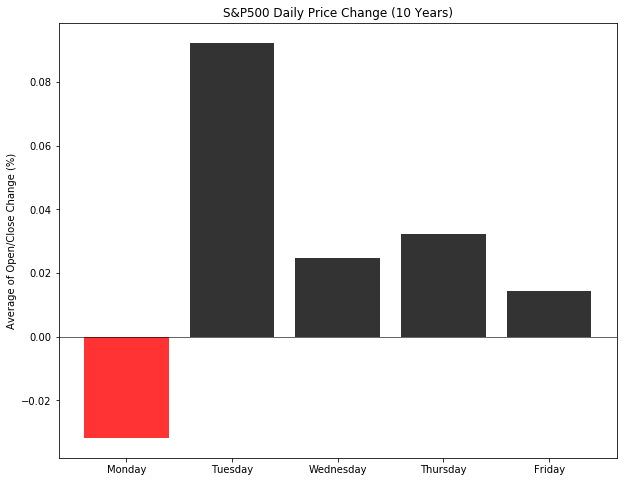

In [11]:
x_axis = np.arange(len(Days))
y_axis = DayGrouped["Daily Change Average"]

plt.figure(figsize=(10,8))

colors = []
for check in DayGrouped["Daily Change Average"]:
    if check >= 0:
        color = "black"
        colors.append(color)
    else:
        color = "r"
        colors.append(color)

plt.bar(x_axis, y_axis, color = colors, alpha=0.8, align="edge")

plt.axhline(y=0, linestyle='-', linewidth = 1, color = "black", alpha = .6)

tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, Days)

plt.ylabel("Average of Open/Close Change (%)")
plt.title("S&P500 Daily Price Change (10 Years)")

plt.savefig("Figures/500DDCA")
plt.show()

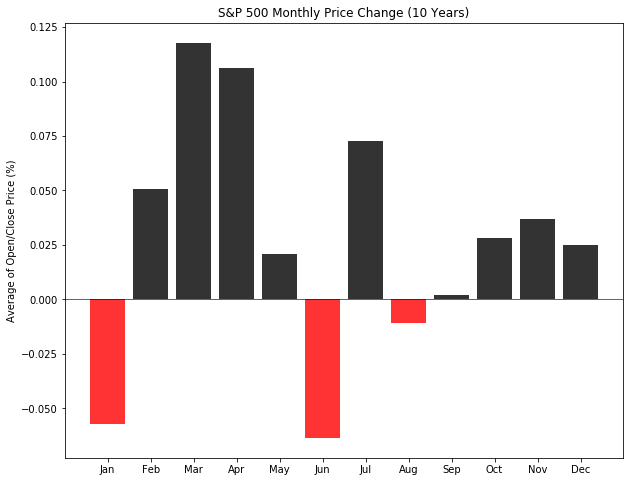

In [12]:
x_axis = np.arange(len(Months))
y_axis = MonthGrouped["Monthly Change Average"]

plt.figure(figsize=(10,8))

mcolors = []

for z in MonthGrouped["Monthly Change Average"]:
    if z >= 0:
        color = "black"
        mcolors.append(color)
    else:
        color = "red"
        mcolors.append(color)

plt.bar(x_axis, y_axis, color=mcolors, alpha=0.8, align="edge")

plt.axhline(y=0, linestyle='-', linewidth = 1, color = "black", alpha = .6)

tick_locations = [value+.4 for value in x_axis]
plt.xticks(tick_locations, Months)

plt.ylabel("Average of Open/Close Price (%)")
plt.title("S&P 500 Monthly Price Change (10 Years)")

plt.savefig("Figures/500MDCA")
plt.show()

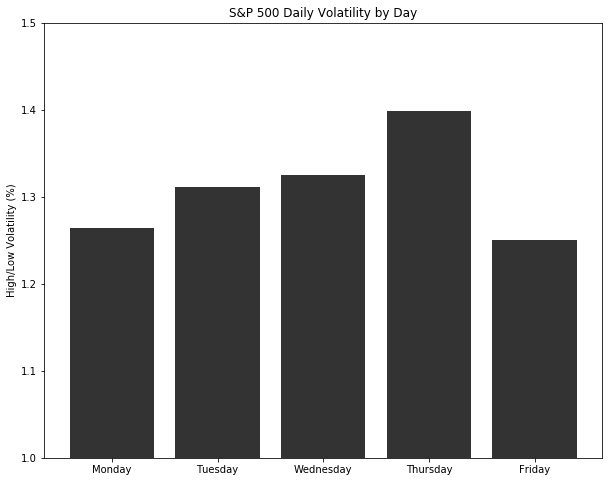

In [13]:
x_axis = np.arange(len(Days))
y_axis = DayGrouped["Volatility"]

plt.figure(figsize=(10,8))

plt.bar(x_axis, y_axis, color='black', alpha=0.8, align="edge")

tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, Days)
plt.ylim(1,1.5)

plt.ylabel("High/Low Volatility (%)")
plt.title("S&P 500 Daily Volatility by Day")

plt.savefig("Figures/500DV")
plt.show()

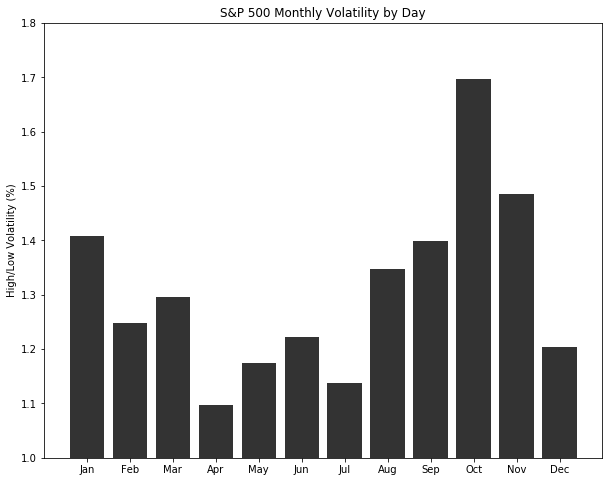

In [14]:
x_axis = np.arange(len(Months))
y_axis = MonthGrouped["Volatility"]

plt.figure(figsize=(10,8))

plt.bar(x_axis, y_axis, color='black', alpha=0.8, align="edge")

plt.axhline(y=0, linestyle='-', linewidth = 1, color = "black", alpha = .6)

tick_locations = [value+.4 for value in x_axis]
plt.xticks(tick_locations, Months)

plt.ylim(1,1.8)

plt.ylabel("High/Low Volatility (%)")
plt.title("S&P 500 Monthly Volatility by Day")

plt.savefig("Figures/500MV")
plt.show()

In [15]:
# Find index number of year breaks to plot on line chart
invert_df = master_df.sort_index(ascending=False)

year_break = [0]
counter = 0
z = 0
while z < (len(invert_df["Year"]) - 2):
    if invert_df["Year"][z] == invert_df["Year"][(z+1)]:
        counter += 1
    else:
        year_break.append(counter)
        counter += 1
    
    z += 1
    
year_break

[0, 250, 502, 754, 1006, 1258, 1508, 1760, 2012, 2264, 2517]

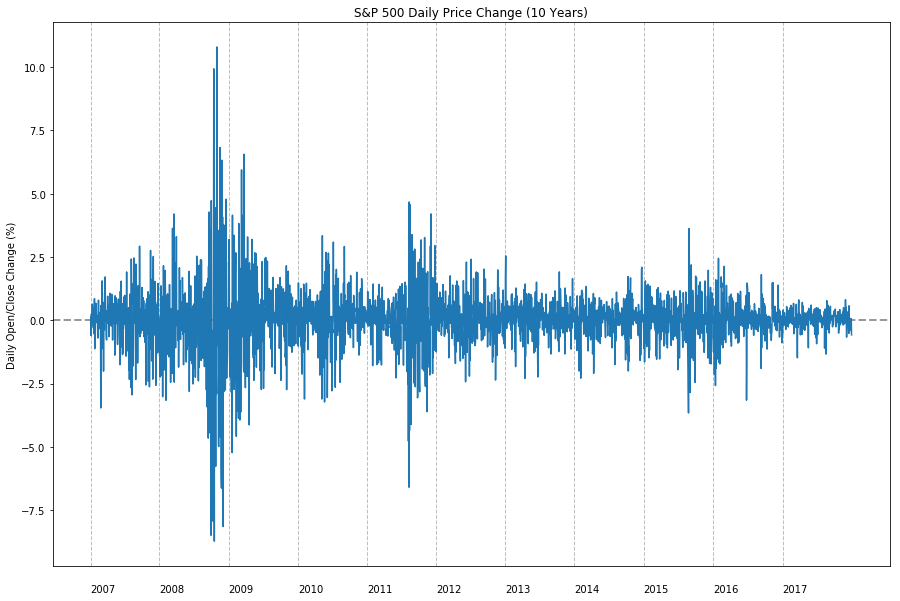

In [16]:
x_axis = np.arange(len(master_df["Date"]))
y_axis = (invert_df["Change"] * 100)
plt.figure(figsize=(15,10))

f = 0
year_label = invert_df["Year"].unique()
year_count = 0
for year in year_break: 
    plt.axvline(x=(year), linestyle = "--", linewidth = 1, color = "black", alpha = .25, gid = year_label[year_count])
    plt.text(year, (min(master_df["Change"] * 100) - 2), year_label[year_count])
    f += 1
    year_count += 1

plt.xticks([],[])
plt.axhline(y=0, linestyle='--', linewidth = 2, color = "black", alpha = .4)
plt.ylabel("Daily Open/Close Change (%)")
plt.title("S&P 500 Daily Price Change (10 Years)")

plt.plot(x_axis, y_axis)
plt.savefig("Figures/500DailyVolLine")
plt.show()